In [1]:
import numpy as np
import pandas as pd

sales = pd.read_csv("sales_data.csv",parse_dates=['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [2]:
sales.shape
sales.info()
sales.describe()
sales['Customer_Age'].mean()
sales['Customer_Age'].median()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

35.0

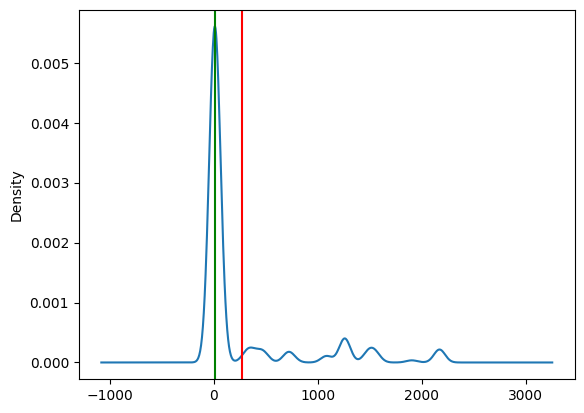

In [3]:
import matplotlib.pyplot as plt

# Diagrama de cajas y bigotes
# sales['Unit_Cost'].plot(kind='box',vert=False) 

# Diagrama de densidad con media y promedio
ax = sales['Unit_Cost'].plot(kind='density')
ax.axvline(sales['Unit_Cost'].mean(),color='red')
ax.axvline(sales['Unit_Cost'].median(),color='green')


In [4]:
# Agregar columnas con datos calculados

sales['Revenue_per_Age'] = sales['Revenue']/sales['Customer_Age']
sales['Revenue_per_Age'].head()

sales['Calculated_Cost'] = sales['Order_Quantity']*sales['Unit_Cost']
sales['Calculated_Cost'].head()

sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180


In [5]:
# Seleccion e indexacion con loc[]

# Obtener los valores cuando el estado es Kentucky
kentucky_sales = sales.loc[sales['State'] == 'Kentucky']
sum(kentucky_sales['Revenue'])

# Obtener el promedio de Ingresos donde el Age_Group sea igual a Adultos (35-64)
sales.loc[sales['Age_Group'] == 'Adults (35-64)','Revenue'].mean()

# Obtener el numero de registros donde el Age_Group es Jovenes(<25) o Adultos(35-64)
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

# Obtener los ingresos (Revenue) del grupo Adultos in Estados Unidos
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'),'Revenue'].mean()

# Aumentar el ingreso de cada venta realizada en Francia
sales.loc[sales['Country'] ==  'France','Revenue'] *= 1.1
sales.loc[sales['Country']=='France'].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
50,2013-07-15,15,July,2013,52,Adults (35-64),F,France,Seine Saint Denis,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,427,360,865.7,15.134615,360
51,2015-07-15,15,July,2015,52,Adults (35-64),F,France,Seine Saint Denis,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,427,360,865.7,15.134615,360
52,2013-08-17,17,August,2013,43,Adults (35-64),F,France,Moselle,Accessories,Bike Racks,Hitch Rack - 4-Bike,28,45,120,1697,1260,3252.7,68.767442,1260
53,2015-08-17,17,August,2015,43,Adults (35-64),F,France,Moselle,Accessories,Bike Racks,Hitch Rack - 4-Bike,27,45,120,1636,1215,3136.1,66.302326,1215
60,2013-09-24,24,September,2013,32,Young Adults (25-34),M,France,Nord,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,356,270,688.6,19.562500,270


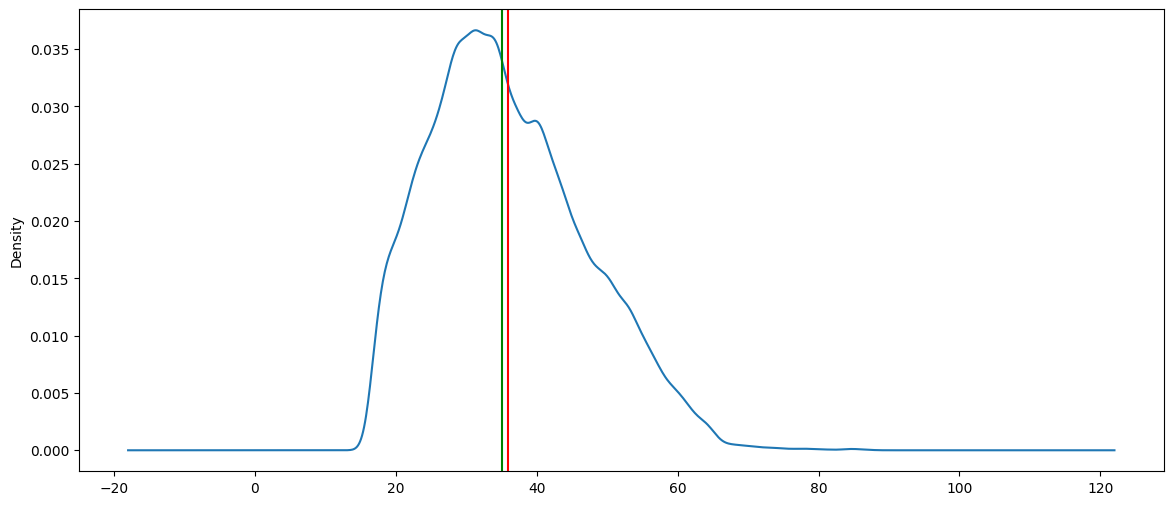

In [6]:
ax = sales['Customer_Age'].plot(kind='density',figsize=(14,6))
ax.axvline(sales['Customer_Age'].mean(),color='red')
ax.axvline(sales['Customer_Age'].median(),color='green')

<Axes: >

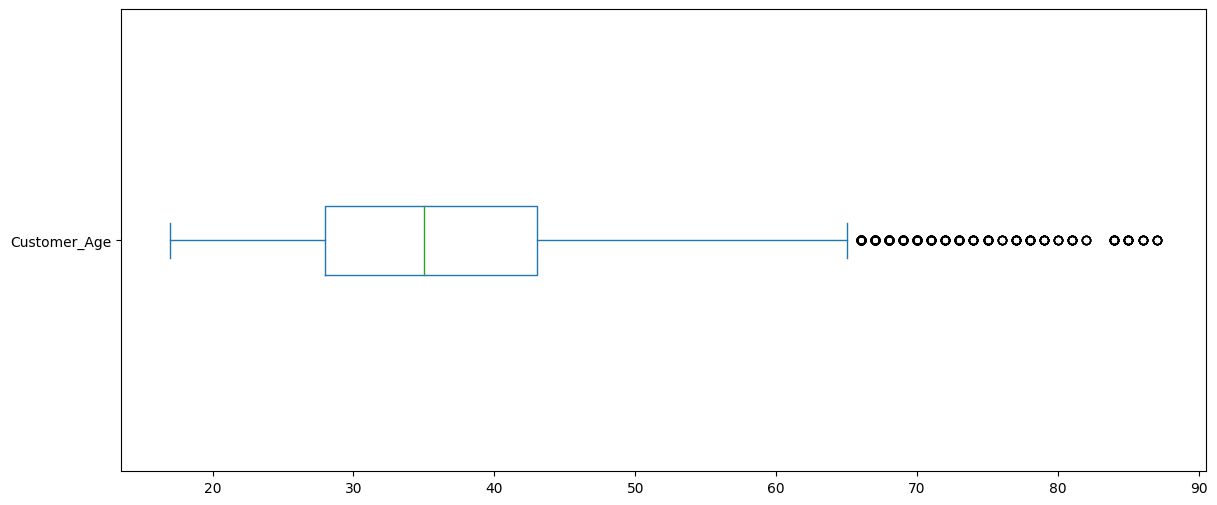

In [7]:
sales['Customer_Age'].plot(kind='box',vert=False,figsize=(14,6))

<Axes: ylabel='Frequency'>

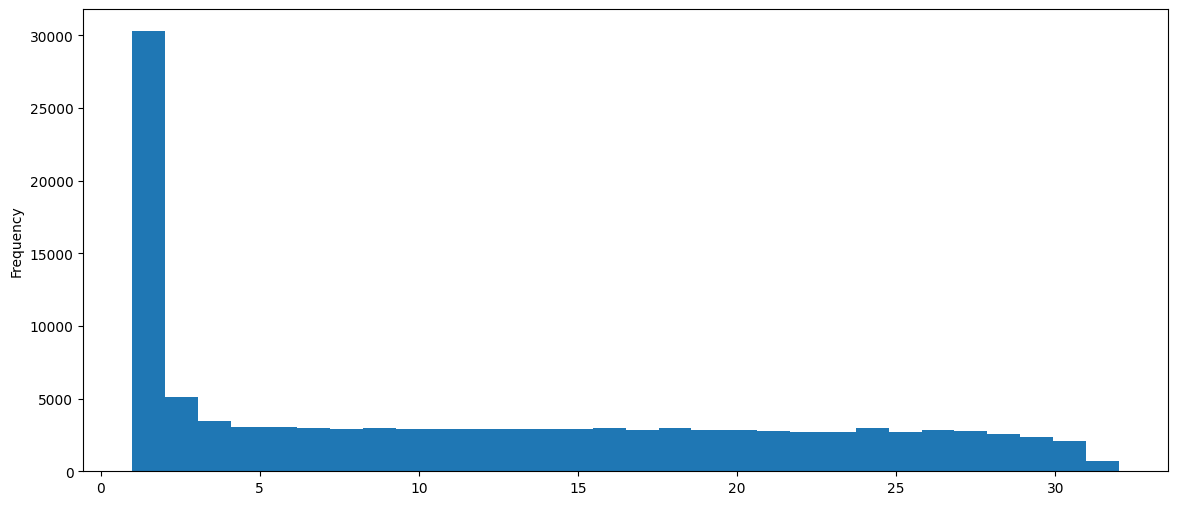

In [8]:
sales['Order_Quantity'].mean()

sales['Order_Quantity'].plot(kind='hist',bins=30,figsize=(14,6))

<Axes: ylabel='Year'>

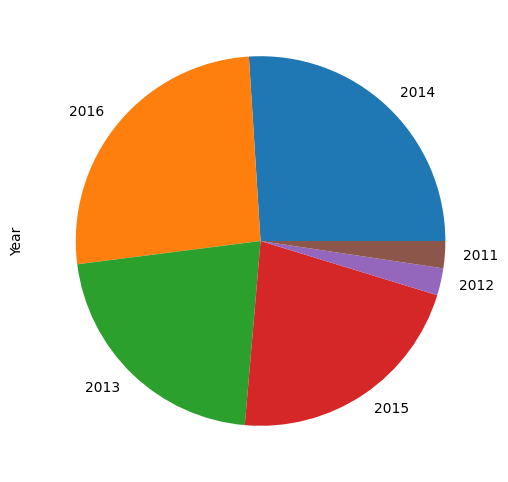

In [9]:
sales['Year'].value_counts()

sales['Year'].value_counts().plot(kind='pie',figsize=(14,6))

<Axes: >

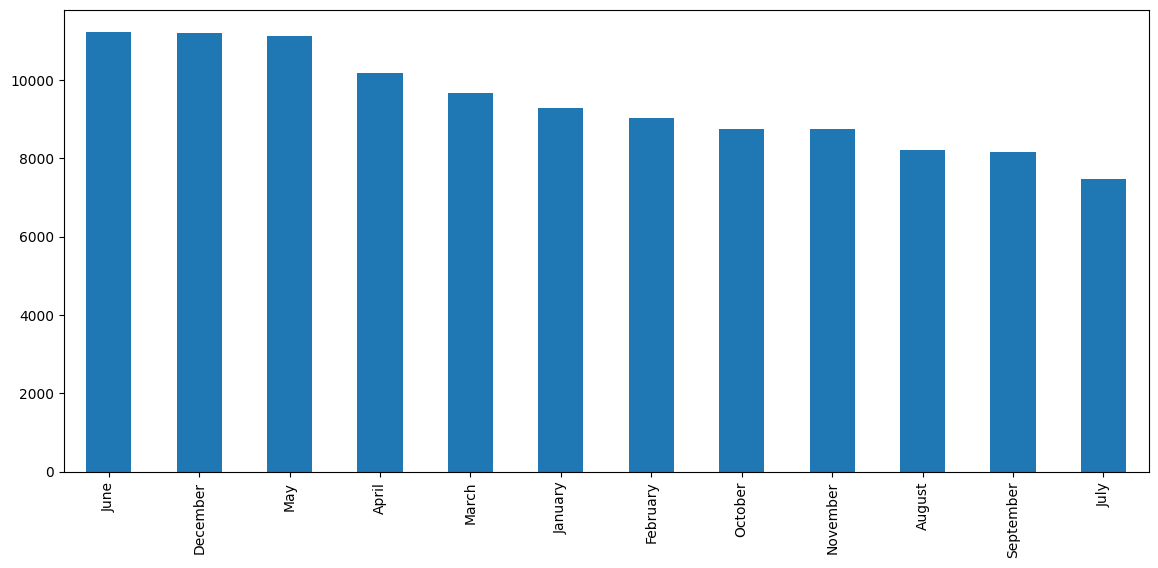

In [10]:
sales['Month'].value_counts().plot(kind='bar',figsize=(14,6))

<Axes: >

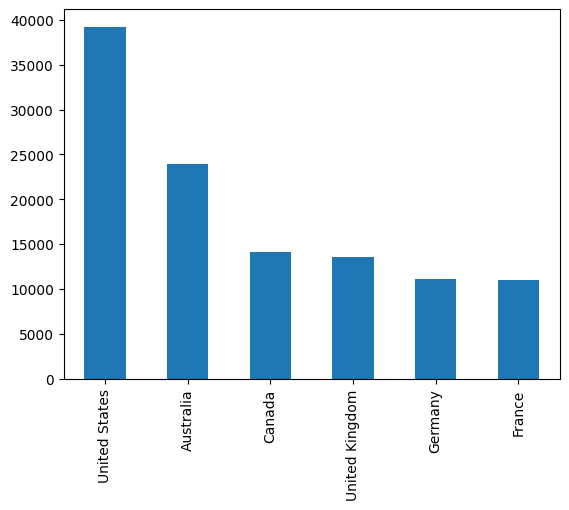

In [11]:
sales['Country'].value_counts().plot(kind='bar')

<Axes: >

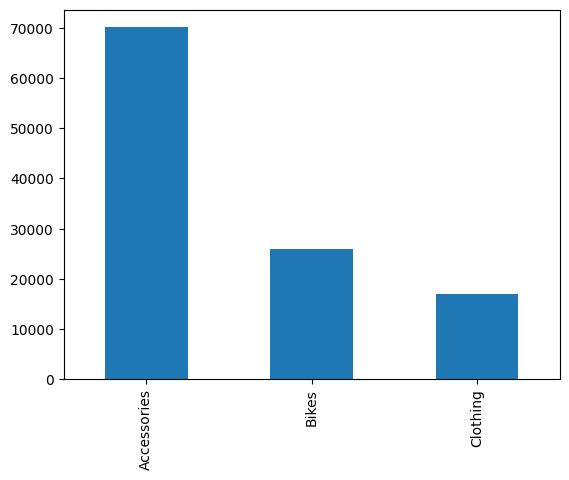

In [12]:
# Obtener un array de productos vendidos
sales['Product_Category'].unique()
sales['Product_Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

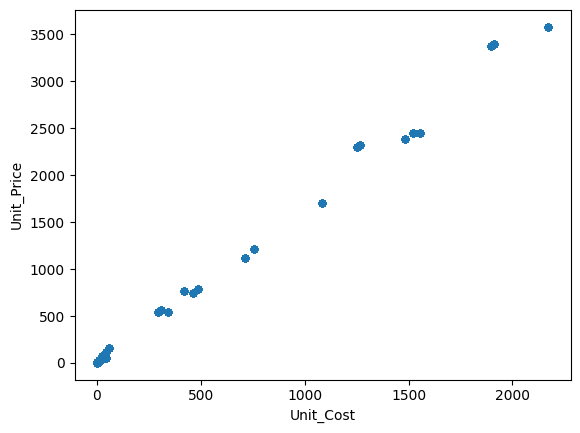

In [13]:
# Calular la relacion entre Costo unitraio y Precio unitario
sales[['Unit_Cost','Unit_Price']].corr()
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price')


,Order_Quantity,Profit
Order_Quantity,1.000000,-0.238863
Profit,-0.238863,1.000000


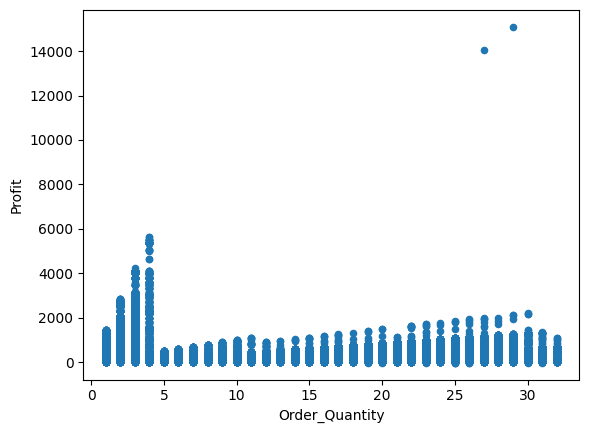

In [14]:
# Calcular la relacion entre cantidad de orden y Profit
sales.plot(kind='scatter', x='Order_Quantity', y='Profit')
sales[['Order_Quantity','Profit']].corr()

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

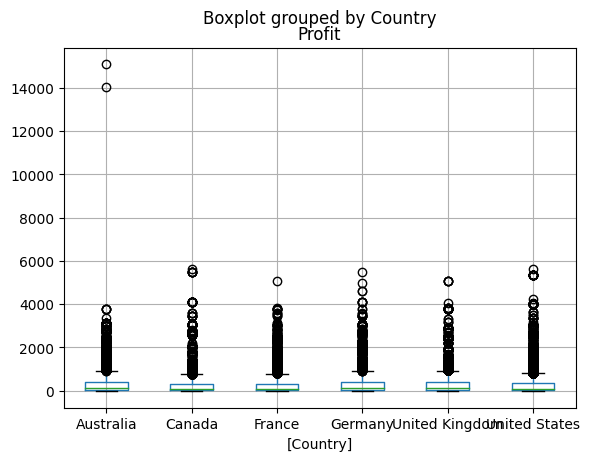

In [15]:
# Calcular lar elacion entre Profit y Country
sales[['Profit','Country']].boxplot(by='Country')

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

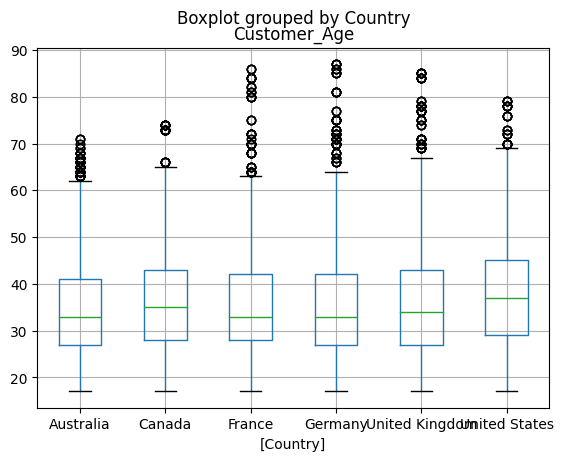

In [16]:
# Relacion entre Edad de cliente y Pais
sales[['Customer_Age','Country']].boxplot(by='Country')

In [17]:
# Concatenar en una sola fecha y transformar a formato fecha
sales['Calculated_Date'] = sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<Axes: >

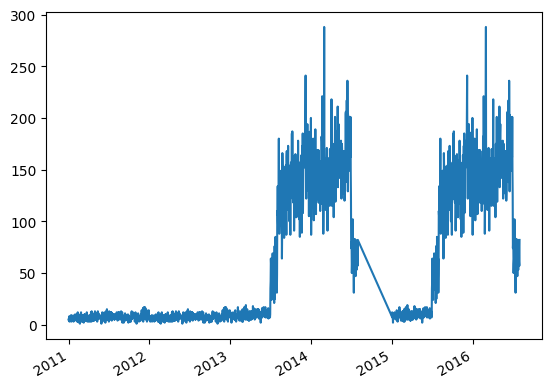

In [18]:
# Graficar el comportamiento de las fechas
sales['Calculated_Date'].value_counts().plot(kind='line')

In [19]:
# Cantidad de ordenes realizadas en Canada o Francia
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

In [20]:
# Cantidad de Bike Racks ordenadas en Canada
sales.loc[(sales['Country']=='Canada') & (sales['Sub_Category']=='Bike_Racks')].shape[0]

0

<Axes: >

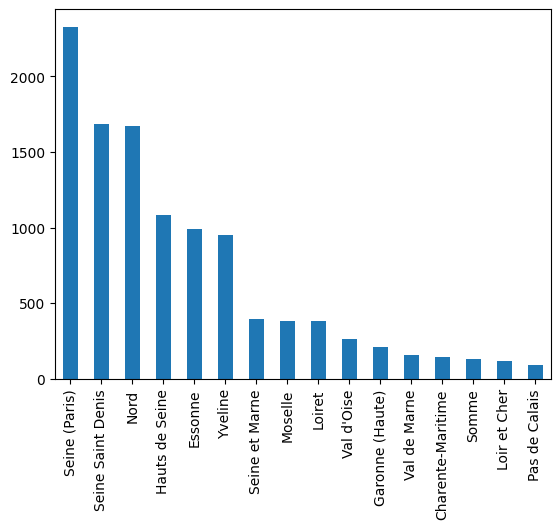

In [21]:
# Cantidad de ordenes realizadas por cada estado en Francia
france_Sales =sales.loc[(sales['Country']=='France'),'State'].value_counts()
france_Sales.plot(kind='bar')

<Axes: ylabel='Product_Category'>

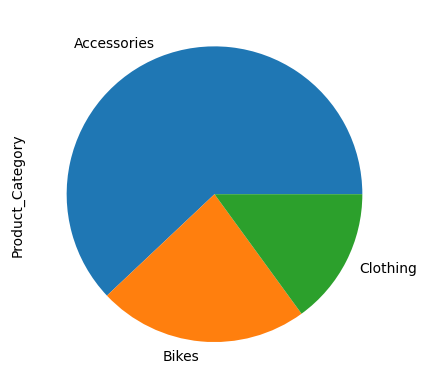

In [22]:
# Ventas realizadas por Categoria de producto
sales['Product_Category'].value_counts().plot(kind='pie')

<Axes: >

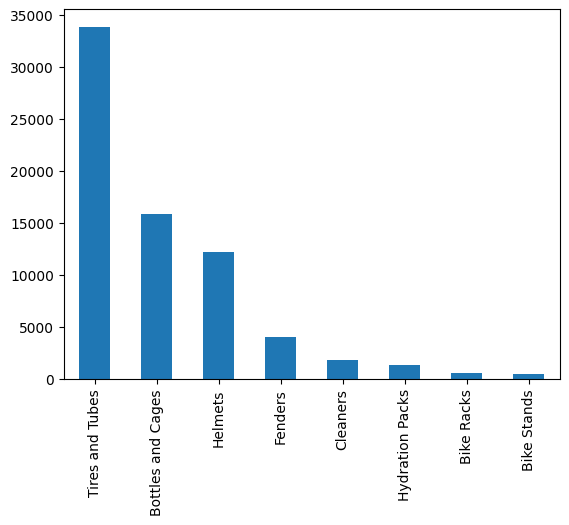

In [23]:
# Ventas realizadas por cada sub categoria 
sales.loc[sales['Product_Category'] == 'Accessories','Sub_Category'].value_counts().plot(kind='bar')

<Axes: ylabel='Sub_Category'>

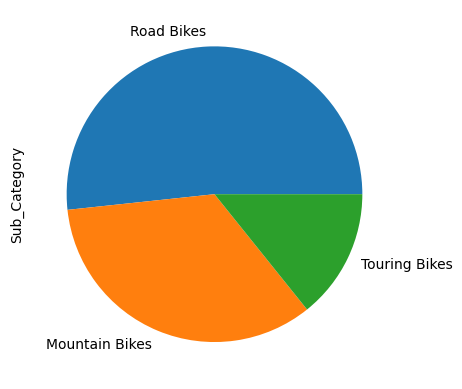

In [24]:
# Ventas realizadas por cada subcategoria de bicicletas
sales.loc[sales['Product_Category']=='Bikes','Sub_Category'].value_counts().plot(kind='pie')

<Axes: >

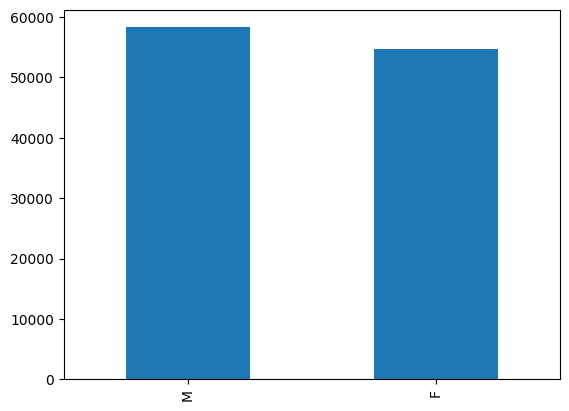

In [25]:
# Cantidad de ventas por genero
sales['Customer_Gender'].value_counts().plot(kind='bar')

In [31]:
# Ventas con mas de 500 en Revenue por clientes hombres
sales.loc[(sales['Revenue'] > 500) & (sales['Customer_Gender']=='M')].shape[0]

21905

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [35]:
# Obtener las 5 ventas con mayores Revenue
sales.sort_values(['Revenue'],ascending=False).head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074.0,1116.807692,42978,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,...,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069.0,1039.788462,40014,2013-07-24
58741,2011-02-14,14,February,2011,41,Adults (35-64),M,France,Essonne,Bikes,...,"Road-150 Red, 44",4,2171,3578,5056,8684,15114.0,335.121951,8684,2011-02-14
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,...,"Road-150 Red, 48",4,2171,3578,5628,8684,14312.0,650.545455,8684,2011-07-08
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,...,"Road-150 Red, 48",4,2171,3578,5485,8684,14169.0,488.586207,8684,2011-03-20


In [36]:
# Obtener la venta con mayor Revenue
sales.loc[sales['Revenue']==sales['Revenue'].max()]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074.0,1116.807692,42978,2015-07-24


In [39]:
#Promedio de cantidad de orden con mas de 10K in revenue
sales.loc[sales['Revenue']>10000,'Order_Quantity'].mean()

3.6721311475409837

In [41]:
#Promedio de cantidad de orden con menos de 10K in revenue
sales.loc[sales['Revenue']<10000,'Order_Quantity'].mean()

11.91500447484781

In [44]:
# Cantidad de ordenes hechas en Mayo de 2016
sales.loc[(sales['Month'] == 'May') & (sales['Year'] == 2016)].shape[0]

5015

In [48]:
# Cantidad de ordenes hechas entre Mayo y Julio de 2016
sales.loc[(sales['Month'].isin(['May','June','July'])) & (sales['Year'] == 2016)].shape[0]

12164

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

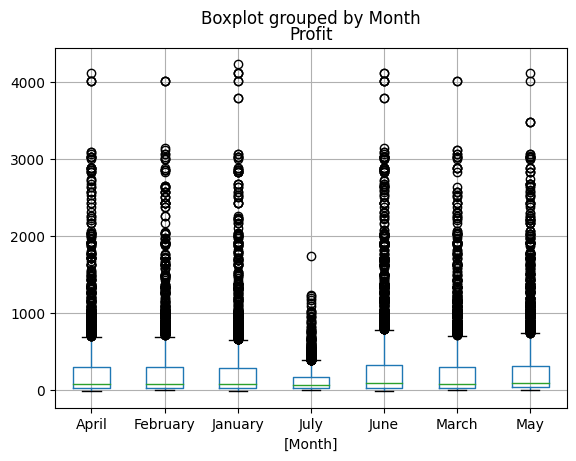

In [49]:
# Ventas realizadas en 2016 por mes
sales.loc[sales['Year'] == 2016,['Profit','Month']].boxplot(by='Month')

In [54]:
# Agregar 7.2% de impuesto a cada unidad en precio unitario dentro de USA
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

In [1]:
sales.info()

NameError: name 'sales' is not defined